# SVM SMOTE Analysis

This algorithm creates new samples in the dataset by utilizing interpolation and extrapolation of samples from the minority class and its closest neighbours.

---

## Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn import svm

from imblearn.over_sampling import SVMSMOTE

plt.style.use("dark_background")

%matplotlib inline

---

## Create Dataset

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

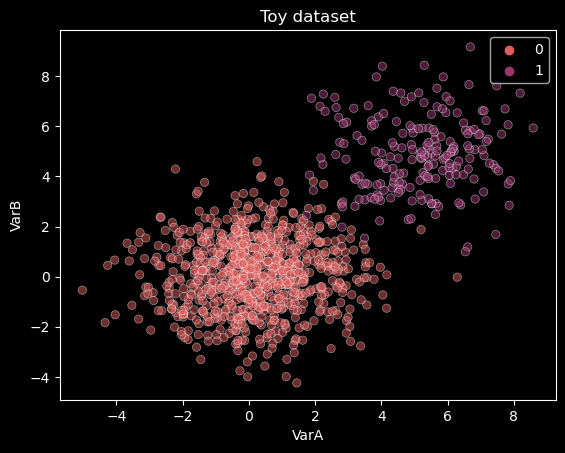

In [9]:
sns.scatterplot(
    data=X, 
    x="VarA", 
    y="VarB", 
    hue=y, 
    alpha=0.5,
    palette= "flare" 
)

plt.title('Toy dataset')
plt.show()

### Find the support vectors

In [4]:
clf = svm.SVC(kernel= "linear")

# Fit data
clf = clf.fit(X, y)

In [5]:
# Support vector indices

clf.support_

array([ 54,  98, 238, 254, 282, 314, 344, 471, 541, 565, 580, 628, 800,
       830, 837, 845, 847, 873, 880, 897, 901, 950, 997])

<blockquote>These are the indices of the support vectors.</blockquote>

In [6]:
# number of support vectors

len(clf.support_)

23

In [7]:
# The support vectors

clf.support_vectors_

array([[ 0.24627924,  4.59252315],
       [ 2.25517978,  3.68546693],
       [ 3.4520868 ,  1.28633487],
       [ 5.19556159,  1.87809236],
       [ 0.90333915,  3.79380959],
       [ 6.28984219, -0.02045112],
       [ 2.61188453,  2.38022216],
       [ 1.94653289,  3.80665402],
       [ 2.19340095,  2.71659191],
       [ 3.09286867,  1.866204  ],
       [ 2.06738199,  2.67977277],
       [ 2.78972421,  2.91099791],
       [ 2.83349857,  2.98438859],
       [ 3.94771688,  2.22628011],
       [ 3.4970792 ,  3.06823588],
       [ 1.73875683,  2.4485233 ],
       [ 3.48944553,  1.53882666],
       [ 1.94784804,  3.45246536],
       [ 2.82946995,  2.78486787],
       [ 3.32394366,  3.09260377],
       [ 1.83103138,  4.05691434],
       [ 3.20053267,  2.81272598],
       [ 2.80910347,  1.97945331]])

<blockquote>These are the observations in our dataset that maximize the separation of the classes.

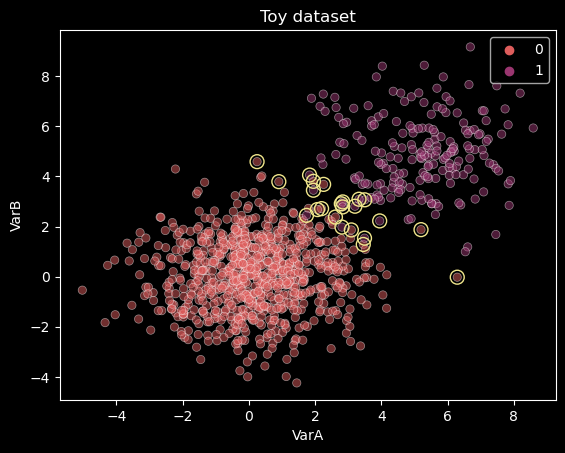

In [28]:
# mark the support vectors

sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    palette= "flare",
    alpha = 0.5
)

plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:,1],
            s = 100,
            linewidths= 1,
            facecolors = "None",
            edgecolors= "khaki")
plt.title("Toy dataset");

<blockquote>Most support vectors are observations that are closer to the boundary. 


<br>There are also support vectors from the majority and the minority classes.</blockquote>

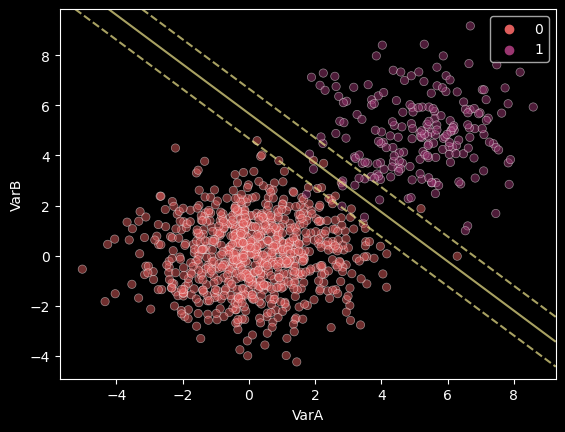

In [35]:
# plot the SVM boundaries

sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add the SVM boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))


# decision function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)

plt.contour(
    xx,
    yy,
    Z,
    colors = "khaki",
    levels = [-1, 0, 1],
    alpha = 0.7,
    linestyles = ["--", "-", "--"]
);

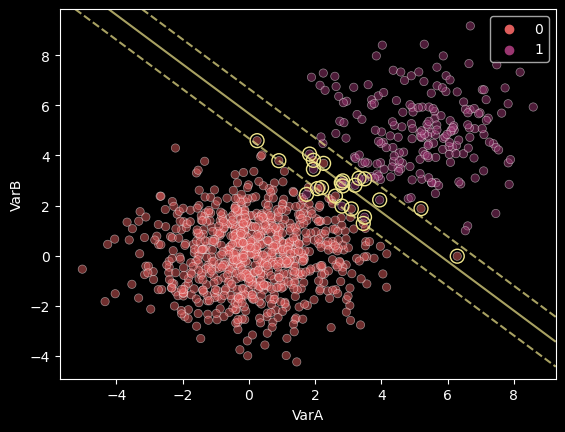

In [34]:
# plot the SVM boundaries

sns.scatterplot(
    data = X,
    x = "VarA",
    y = "VarB",
    hue = y,
    alpha = 0.5,
    palette= "flare"
)

plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:,1],
            s = 100,
            linewidths= 1,
            facecolors = "None",
            edgecolors= "khaki")

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add the SVM boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))


# decision function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)

plt.contour(
    xx,
    yy,
    Z,
    colors = "khaki",
    levels = [-1, 0, 1],
    alpha = 0.7,
    linestyles = ["--", "-", "--"]
);